## Import standard Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data

In [2]:
df = pd.read_csv('cancer_tumor_data_features.csv')

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Scaling the Data with StandardScalar

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()

In [6]:
scaled_X = scaler.fit_transform(df)

In [7]:
scaled_X

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

## Now, lets see how variance of data differ when we reduce the data to different number rof dimensions

In [8]:
from sklearn.decomposition import PCA

In [9]:
explained_variance = []

for n in range(1,30):
    pca = PCA(n_components=n)
    pca.fit(scaled_X)
    
    explained_variance.append(np.sum(pca.explained_variance_ratio_))

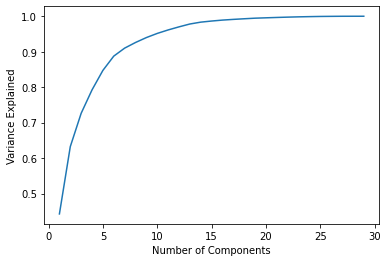

In [10]:
plt.plot(range(1,30),explained_variance)
plt.xlabel("Number of Components")
plt.ylabel("Variance Explained");

## Lets reduce the dimensions where variance is 95% of the original data

In [11]:
pca = PCA(.95)
pca.fit(scaled_X)

PCA(n_components=0.95)

In [12]:
pca.n_components_

10

## We see that we need to reduce the dimension to 10 components

In [13]:
principal_components = pca.fit_transform(scaled_X)

In [14]:
pca.components_

array([[ 2.18902444e-01,  1.03724578e-01,  2.27537293e-01,
         2.20994985e-01,  1.42589694e-01,  2.39285354e-01,
         2.58400481e-01,  2.60853758e-01,  1.38166959e-01,
         6.43633464e-02,  2.05978776e-01,  1.74280281e-02,
         2.11325916e-01,  2.02869635e-01,  1.45314521e-02,
         1.70393451e-01,  1.53589790e-01,  1.83417397e-01,
         4.24984216e-02,  1.02568322e-01,  2.27996634e-01,
         1.04469325e-01,  2.36639681e-01,  2.24870533e-01,
         1.27952561e-01,  2.10095880e-01,  2.28767533e-01,
         2.50885971e-01,  1.22904556e-01,  1.31783943e-01],
       [-2.33857132e-01, -5.97060883e-02, -2.15181361e-01,
        -2.31076711e-01,  1.86113023e-01,  1.51891610e-01,
         6.01653628e-02, -3.47675005e-02,  1.90348770e-01,
         3.66575471e-01, -1.05552152e-01,  8.99796818e-02,
        -8.94572342e-02, -1.52292628e-01,  2.04430453e-01,
         2.32715896e-01,  1.97207283e-01,  1.30321560e-01,
         1.83848000e-01,  2.80092027e-01, -2.19866379e-

In [15]:
df_comp = pd.DataFrame(pca.components_,index=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'],columns=df.columns)

In [16]:
df_comp

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
PC1,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
PC2,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339
PC3,-0.008531,0.064550,-0.009314,0.028700,-0.104292,-0.074092,0.002734,-0.025564,-0.040240,-0.022574,...,-0.047507,-0.042298,-0.048547,-0.011902,-0.259798,-0.236076,-0.173057,-0.170344,-0.271313,-0.232791
PC4,0.041409,-0.603050,0.041983,0.053434,0.159383,0.031795,0.019123,0.065336,0.067125,0.048587,...,0.015417,-0.632808,0.013803,0.025895,0.017652,-0.091328,-0.073951,0.006007,-0.036251,-0.077053
PC5,0.037786,-0.049469,0.037375,0.010331,-0.365089,0.011704,0.086375,-0.043861,-0.305941,-0.044424,...,-0.004407,-0.092883,0.007454,-0.027391,-0.324435,0.121804,0.188519,0.043332,-0.244559,0.094423
PC6,0.018741,-0.032179,0.017308,-0.001888,-0.286374,-0.014131,-0.009344,-0.052050,0.356458,-0.119431,...,-0.000291,-0.050008,0.008501,-0.025164,-0.369255,0.047706,0.028379,-0.030873,0.498927,-0.080224
PC7,-0.124088,0.011400,-0.114477,-0.051653,-0.140669,0.030918,-0.107520,-0.150482,-0.093891,0.295760,...,-0.009710,0.009871,-0.000446,0.067832,-0.108831,0.140473,-0.060488,-0.167967,-0.018491,0.374658
PC8,-0.007452,0.130675,-0.018687,0.034674,-0.288975,-0.151396,-0.072827,-0.152322,-0.231531,-0.177121,...,0.042619,0.036252,0.030559,0.079394,0.205852,0.084020,0.072468,-0.036171,0.228225,0.048361
PC9,-0.223110,0.112699,-0.223739,-0.195586,0.006425,-0.167841,0.040591,-0.111971,0.256040,-0.123741,...,-0.112141,0.103341,-0.109614,-0.080732,0.112316,-0.100678,0.161909,0.060488,0.064638,-0.134174
PC10,0.095486,0.240934,0.086386,0.074956,-0.069293,0.012936,-0.135602,0.008055,0.572069,0.081103,...,0.077362,0.029551,0.050508,0.069921,-0.128305,-0.172134,-0.311639,-0.076648,-0.029563,0.012610


## Lets, visualize the relationship of Original features to each principle components

<AxesSubplot:>

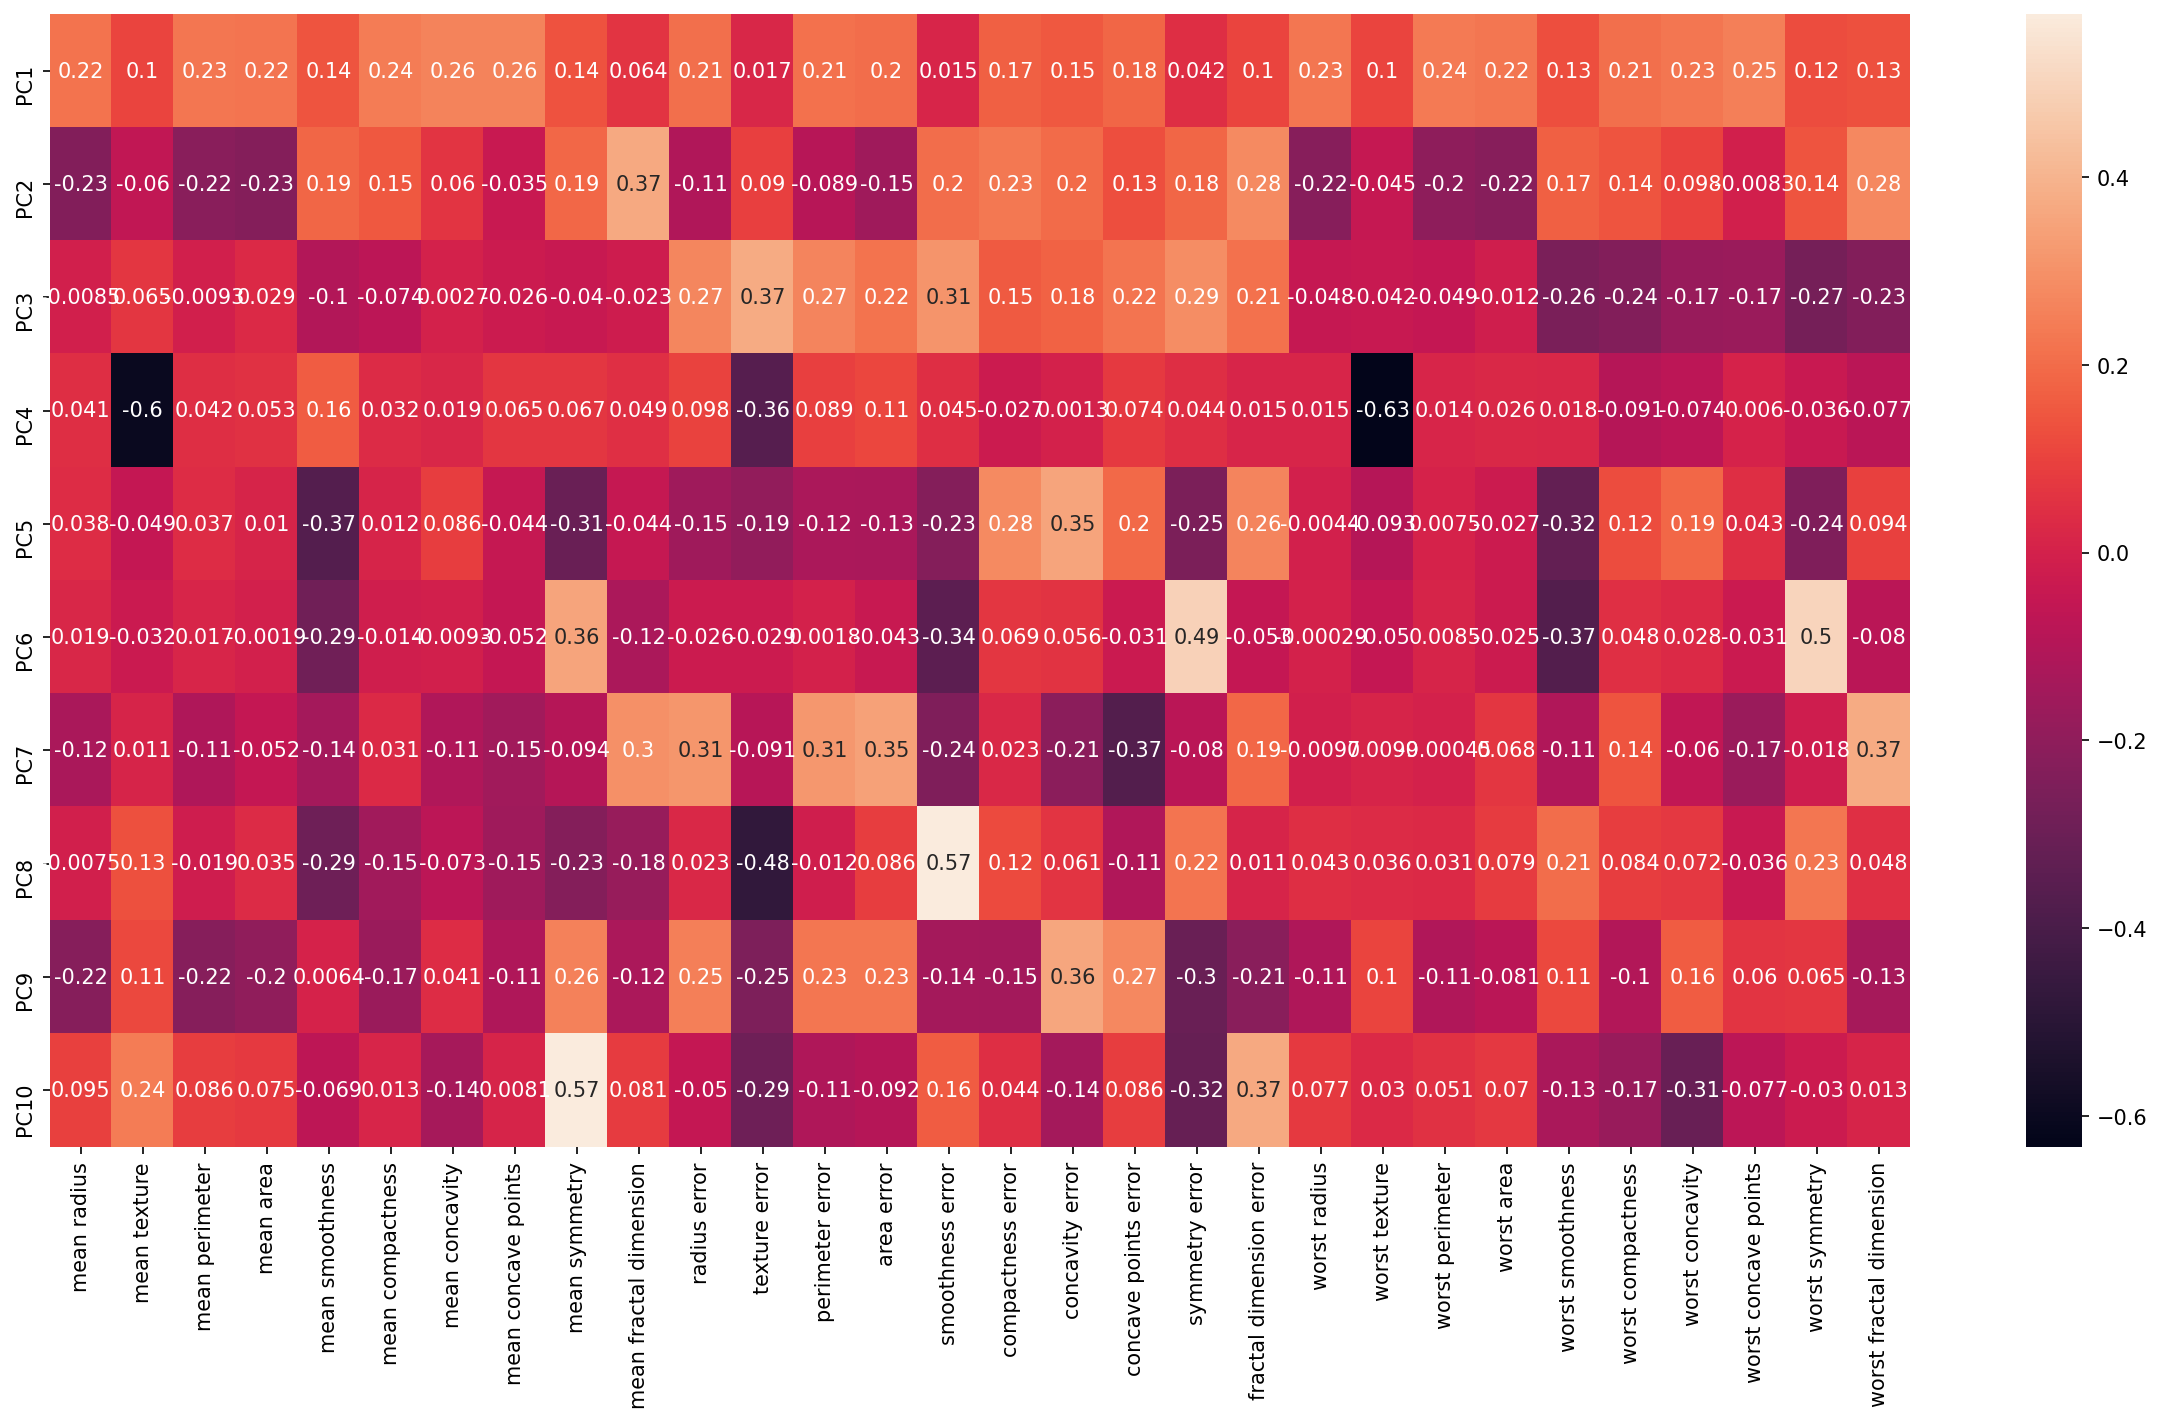

In [17]:
plt.figure(figsize=(20,10),dpi=150)
sns.heatmap(df_comp,annot=True)

In [18]:
print("Explained variance ratio: ", np.sum(pca.explained_variance_ratio_))

Explained variance ratio:  0.9515688143366666
